# [Predicting for Fantasy Baseball](https://pathfinder.datarobot.com/notebook/predictions-fantasy-baseball?tab=overview)

OneNote2021 > DataRobot > Pathfinder 用例推廣 


11/24/2021 13:48 found an example 'fantacy baseball' from the above 'pathfinder' use cases and I am then trying their example zepl notebook on my local computer. Data has been downloaded "Read in data_2021-09-02 01_49_03 AM.tsv" Notebook itself seems not downloadable but I have got the .HTML at my playground. Then I need to find a Directory … I'd better collect all my DataRobot studies to one place which is GitHub\examples-for-data-scientists\Playground\    




In [ ]:
# LBB2 has not installed DataRobot so I carefully make this jupyternotebook to use the correct kernel (my Orange3 venv) and try pip install.
# Anticipating the installation can be done within this VS Code JupyterNotebook.
!pip install datarobot

# The above has two problems: 
#   catboost 0.26.1 requires graphviz, which is not installed.
#   catboost 0.26.1 requires plotly, which is not installed.
# Don't care for now, let's go on. Yes we can because import datarobot is ok. 

Defaulting to user installation because normal site-packages is not writeable


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 0.26.1 requires graphviz, which is not installed.
catboost 0.26.1 requires plotly, which is not installed.


In [16]:
%run c:\Users\8304018\Documents\GitHub\examples-for-data-scientists\Playground\jupyter-extension-4-DataRobot.py

c:\Users\8304018\Documents\GitHub\examples-for-data-scientists\Playground\jupyter-extension-4-DataRobot.py
煩不煩？已經執行過了！ 


In [3]:
%matplotlib inline
from IPython.core.display import HTML
import datarobot as dr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

light_blue = "#598fd6"
grey_blue = "#5f728b"
orange = "#dd6b3d"

In [5]:
data_path = "https://s3.amazonaws.com/datarobot-use-case-datasets/baseball_modeling.csv"
pathfinder_df = pd.read_csv(data_path, encoding = "ISO-8859-1")
display(pathfinder_df.head(100)) # Zepl's z.show() === display() 

,age,weight,height,bats,avg3CS,BB,years,HBP,lastIBB,avgGIDP,...,lastSLG,lastISO,lastOBP,lastOPS,lastBABIP,lastwOBA,currentTeam,currentPark,teamHistory,parkHistory
0,31,180,72,R,5.333333,603,11,20,9,16.181818,...,0.514035,0.185965,0.392744,0.906780,0.324701,0.391494,Milwaukee Braves,County Stadium,Milwaukee Braves Milwaukee Braves Milwaukee Br...,County Stadium County Stadium County Stadium C...
1,33,180,72,R,3.666667,739,13,22,15,15.923077,...,0.538972,0.260365,0.356105,0.895076,0.263270,0.378759,Atlanta Braves,Atlanta-Fulton County Stadium,Milwaukee Braves Milwaukee Braves Milwaukee Br...,County Stadium County Stadium County Stadium C...
2,42,180,72,R,0.666667,1367,22,32,3,14.545455,...,0.354839,0.120430,0.332103,0.686942,0.237745,0.307763,Milwaukee Brewers,County Stadium,Milwaukee Braves Milwaukee Braves Milwaukee Br...,County Stadium County Stadium County Stadium C...
3,41,180,72,R,0.333333,1297,21,31,6,14.523810,...,0.491176,0.223529,0.341207,0.832384,0.242321,0.357243,Milwaukee Brewers,County Stadium,Milwaukee Braves Milwaukee Braves Milwaukee Br...,County Stadium County Stadium County Stadium C...
4,40,180,72,R,0.666667,1258,20,31,13,14.950000,...,0.642857,0.341837,0.402151,1.045008,0.255738,0.436504,Atlanta Braves,Atlanta-Fulton County Stadium,Milwaukee Braves Milwaukee Braves Milwaukee Br...,County Stadium County Stadium County Stadium C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,37,165,69,B,3.333333,468,12,47,0,5.750000,...,0.366925,0.093023,0.320482,0.687407,0.310976,0.305489,Kansas City Royals,Kauffman Stadium,St. Louis Cardinals St. Louis Cardinals St. Lo...,Busch Stadium II Busch Stadium II Busch Stadiu...
96,32,165,69,B,6.000000,252,7,25,9,5.857143,...,0.381579,0.123684,0.349887,0.731466,0.306931,0.319150,Anaheim Angels,Edison International Field,St. Louis Cardinals St. Louis Cardinals St. Lo...,Busch Stadium II Busch Stadium II Busch Stadiu...
97,36,165,69,B,2.333333,445,11,43,1,5.727273,...,0.403704,0.109259,0.364975,0.768679,0.328326,0.340162,Kansas City Royals,Kauffman Stadium,St. Louis Cardinals St. Louis Cardinals St. Lo...,Busch Stadium II Busch Stadium II Busch Stadiu...
98,35,165,69,B,4.000000,386,10,38,0,5.000000,...,0.317073,0.115854,0.316062,0.633135,0.230769,0.290637,Texas Rangers,The Ballpark at Arlington,St. Louis Cardinals St. Louis Cardinals St. Lo...,Busch Stadium II Busch Stadium II Busch Stadiu...


In [6]:
def card(title, value, secondValue = ""):
    display(HTML("""
        <div style="width: 250px;text-align:center;float:left;margin:10px 10px">
          <div style="font-weight:bold;font-size:16px;color:{bc_color}">
            {title}
          </div>
          <div style='background-color:{bc_color};color:white;padding:10px 10px; font-size: 30px'>
            {value}
            <div style="font-size:15px">{secondValue}</div>
          </div>
        </div>\n""".format(title=title, value=value, secondValue=secondValue, bc_color=light_blue)))


In [8]:
# Get metrics to be displayed
three_yr_on_base_avg = round(pathfinder_df['avg3wOBA'].mean(),2)
three_yr_rbi_avg = round(pathfinder_df['avg3RBI'].mean(),2)
three_yr_on_base_plus_slugging = round(pathfinder_df['avg3OPS'].mean(),2)
atbat_avg = round(pathfinder_df['AB'].mean(),2)

# Call Card function
card("3-yr Weighted On-Base Avg", three_yr_on_base_avg, "avg3wOBA")
card("3-yr RBI Avg", three_yr_rbi_avg, "avg3RBI")
card("3-yr On-Base Avg + Slugging %", three_yr_on_base_plus_slugging, "avg3OPS")
card("At Bats Avg", atbat_avg, "AB")

In [9]:
avg_value_df = pathfinder_df.groupby("currentTeam")['avg3wOBA'].mean().reset_index()
display(avg_value_df) # Zepl 可以直接選各種圖表，確實很方便。像這個就可以按一下顯示為直方圖 histogram. 

,currentTeam,avg3wOBA
0,Anaheim Angels,0.332098
1,Arizona Diamondbacks,0.332168
2,Atlanta Braves,0.323957
3,Baltimore Orioles,0.324972
4,Boston Red Sox,0.334947
5,California Angels,0.309238
6,Chicago Cubs,0.319928
7,Chicago White Sox,0.321684
8,Cincinnati Reds,0.323327
9,Cleveland Indians,0.322949


# Connect to DataRobot

In [12]:
# peforth.execute('api_token').pop()
# peforth.execute('endpoint').pop()
%f api_token -->
%f endpoint -->

api_token --> NjBiNzQzMzA3NWVkNjdhNjhjM2M4Y2RkOkZSS0RTL1lYaUE1WWRZbU5Ka1gwb1YvM3lHTmc3ZVByeXErUGo0SmZpOHc9 (<class 'str'>)
endpoint --> https://app.datarobot.com/api/v2 (<class 'str'>)


In [13]:
token = peforth.execute('api_token').pop()  # z.getDatasource("datarobot_api")['token']
dr.Client(token=token , endpoint=peforth.execute('endpoint').pop())
# wall time 0.9s

In [18]:
# Uncomment and replace Project ID if project already exists in DataRobot
project = dr.Project.get("619dfb1ddc71bb8a8dd68a41")  # 真的是咱的 project id 

In [14]:
# Create project and pass in data
# project = dr.Project.create(sourcedata = pathfinder_df,
#                            project_name = 'Predictions for Fantasy Basebal')
# wall time 1m 46.8s 

In [17]:

# Set Project target to the appropriate feature (column name). We will use the LogLoss metric to measure performance and manually specify Autopilot to run on a subset of models
# project.set_target(target='avg3wOBA',
#                  mode=dr.AUTOPILOT_MODE.QUICK, 
#                  worker_count='-1')

# When running, check the DataRobot web site and observe it has started running! 
# wall time 1m 25.9s but the DataRobot web site is running models that takes longer time.

# wOBA 是一個版本的在壘百分比，它說明了球員如何到達本壘 

Project(Predictions for Fantasy Basebal)

In [ ]:

# Get the project metric (i.e LogLoss, RMSE, etc...)
metric = project.metric

# Get Project URL
project_url = project.get_leaderboard_ui_permalink()


In [19]:

# Display Project ID and Name
display(HTML('''<h3> Project Details</h3> 
                    <ul>
                        <li>Project URL: <a href="{project_url}" target="_blank">{project_url}</a></li>
                        <li>Project ID: {project_id}</li>
                        <li>Project Name: {project_name}</li> 
                    </ul>
    '''.format(project_url = project_url, project_id = project.id, project_name = project.project_name)))

In [21]:
# Pause notebook execution until training is complete
project.wait_for_autopilot(check_interval=30)

In progress: 16, queued: 0 (waited: 0s)
In progress: 16, queued: 0 (waited: 2s)
In progress: 16, queued: 0 (waited: 3s)
In progress: 16, queued: 0 (waited: 4s)
In progress: 16, queued: 0 (waited: 6s)
In progress: 16, queued: 0 (waited: 9s)
In progress: 15, queued: 0 (waited: 13s)
In progress: 10, queued: 0 (waited: 21s)
In progress: 10, queued: 0 (waited: 34s)
In progress: 2, queued: 0 (waited: 61s)
In progress: 1, queued: 0 (waited: 92s)
In progress: 0, queued: 0 (waited: 123s)
In progress: 0, queued: 0 (waited: 154s)
In progress: 0, queued: 0 (waited: 185s)
In progress: 0, queued: 0 (waited: 215s)
In progress: 5, queued: 0 (waited: 246s)
In progress: 5, queued: 0 (waited: 277s)
In progress: 2, queued: 0 (waited: 309s)
In progress: 1, queued: 0 (waited: 339s)
In progress: 1, queued: 0 (waited: 370s)
In progress: 1, queued: 0 (waited: 401s)
In progress: 1, queued: 0 (waited: 432s)
In progress: 0, queued: 0 (waited: 463s)
In progress: 1, queued: 0 (waited: 494s)
In progress: 2, queued: 

# Helper Function: Sort model that performed with the best score by metric

In [22]:
# Helper Function: Sort model that performed with the best score by metric

def sorted_by_metric(models, test_set, metric):
    models_with_score = [model for model in models if
                         model.metrics[metric][test_set] is not None]
    
    return sorted(models_with_score,
                  key=lambda model: model.metrics[metric][test_set])

# Get Top Performing Model

In [23]:
# Get Top Performing Model

models = project.get_models()

In [24]:
# Uncomment if this is not set above in the create project paragraph
metric = project.metric

In [25]:
# Get top performing model
model_top = sorted_by_metric(models, 'crossValidation', metric)[0]
print('''The top performing model is {model} using metric, {metric}'''.format(model = str(model_top), metric = metric))

The top performing model is Model('AVG Blender') using metric, RMSE


In [32]:
%f model_top :> model_number -->
%f model_top :> id -->
%f model_top :> blueprint_id -->
%f model_top :> blueprint -->
%f \ model_top dir -->


model_top :> model_number --> 62 (<class 'int'>)
model_top :> id --> 619ee433b31aa219ccb7d403 (<class 'str'>)
model_top :> blueprint_id --> cce5f6a4b82d9cd23c8a9b97d343b1b2 (<class 'str'>)
model_top :> blueprint --> Blueprint(AVG Blender) (<class 'datarobot.models.blueprint.Blueprint'>)


# Helper Function: Produce Histograms and Lift charts using matplotlib

In [36]:
# Set styling
dr_dark_blue = '#08233F'
dr_blue = '#1F77B4'
dr_orange = '#FF7F0E'
dr_red = '#BE3C28'
dr_light_blue = '#3CA3E8'

# Create function to build Historgrams
def rebin_df(raw_df, number_of_bins):
    cols = ['bin', 'actual_mean', 'predicted_mean', 'bin_weight']
    new_df = pd.DataFrame(columns=cols)
    current_prediction_total = 0
    current_actual_total = 0
    current_row_total = 0
    x_index = 1
    bin_size = 60 / number_of_bins
    for rowId, data in raw_df.iterrows():
        current_prediction_total += data['predicted'] * data['bin_weight']
        current_actual_total += data['actual'] * data['bin_weight']
        current_row_total += data['bin_weight']

        if ((rowId + 1) % bin_size == 0):
            x_index += 1
            bin_properties = {
                'bin': ((round(rowId + 1) / 60) * number_of_bins),
                'actual_mean': current_actual_total / current_row_total,
                'predicted_mean': current_prediction_total / current_row_total,
                'bin_weight': current_row_total
            }

            new_df = new_df.append(bin_properties, ignore_index=True)
            current_prediction_total = 0
            current_actual_total = 0
            current_row_total = 0
    return new_df

# Create function to build lift charts
def matplotlib_lift(bins_df, bin_count, ax):
    grouped = rebin_df(bins_df, bin_count)
    ax.plot(range(1, len(grouped) + 1), grouped['predicted_mean'],
            marker='+', lw=1, color=dr_blue)
    ax.plot(range(1, len(grouped) + 1), grouped['actual_mean'],
            marker='*', lw=1, color=dr_orange)
    ax.set_xlim([0, len(grouped) + 1])
    ax.set_facecolor(dr_dark_blue)
    ax.legend(loc='best')
    ax.set_title('Lift chart {} bins'.format(bin_count))
    ax.set_xlabel('Sorted Prediction')
    ax.set_ylabel('Value')
    return grouped

def matpltlib_residual(residual):
    if residual:
        validation = residuals[2]
        actual, predicted, _, _ = zip(*validation.data)
        data = {'actual': actual, 'predicted': predicted}
        data_frame = pd.DataFrame(data)
        
        plot = data_frame.plot.scatter(
            x='actual',
            y='predicted',
            legend=False,
            color=dr_light_blue,
        )
        plot.set_facecolor(dr_dark_blue)
        
        # define our axes with a minuscule bit of padding
        min_x = min(data['actual']) - 5
        max_x = max(data['actual']) + 5
        min_y = min(data['predicted']) - 5
        max_y = max(data['predicted']) + 5
    
        biggest_value = max(abs(i) for i in [min_x, max_x, min_y, max_y])
    
        # plot a diagonal 1:1 line to show the "perfect fit" case
        diagonal = np.linspace(-biggest_value, biggest_value, 100)
        plt.plot(diagonal, diagonal, color='gray')
    
        plt.xlabel('Actual Value')
        plt.ylabel('Predicted Value')
        plt.axis('equal')
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
    
        plt.title('Predicted Values vs. Actual Values', y=1.04)


# Lift chart

No handles with labels found to put in legend.
No handles with labels found to put in legend.


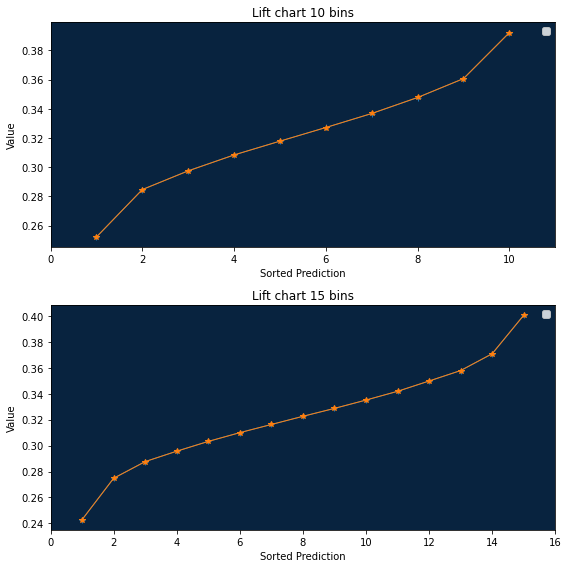

In [38]:

lift_chart = model_top.get_lift_chart('validation')

#Save the result into a pandas dataframe
lift_df = pd.DataFrame(lift_chart.bins)

bin_counts = [10, 15]
f, axarr = plt.subplots(len(bin_counts))
f.set_size_inches((8, 4 * len(bin_counts)))

rebinned_dfs = []
for i in range(len(bin_counts)):
    rebinned_dfs.append(matplotlib_lift(lift_df, bin_counts[i], axarr[i]))

plt.tight_layout()
# plt.show()

# 畫不出來是因為 vs code jupyter 的 Mimetype 要選一下。總之直接看 DR web page is even better or use lift_df data to plot on excel is also very easy.